# Birds, dinosaurs, reptiles, and mammals (oh my)

We don't have data on cerebrum size for most organisms, but we can apply machine learning to body mass and brain volume values to classify organisms into birds, dinosaurs, reptiles, and mammals.

## Import libraries and data

Import the libraries you need to build a decision tree and read the bird_dino_gator.csv file into a dataframe. How many rows does the data have?

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import neighbors 
from sklearn import datasets
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import collections 
from sklearn import metrics
import matplotlib as mpl

In [58]:
var = pd.read_csv("bird_mammal_dino_reptile.csv")
var["Species Type"].loc[var["Species Type"]=="B"]=0
var["Species Type"].loc[var["Species Type"]=="D"]=1
var["Species Type"].loc[var["Species Type"]=="R"]=2
var["Species Type"].loc[var["Species Type"]=="M"]=3
var

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Species Type,Genus,Species,Brain mass (g),Body mass (g)
0,3,Sciurus,aberti,6.850000e+00,626.500
1,3,Cynomops,abrasus,4.180000e-01,33.300
2,3,Myoprocta,acouchy,9.900000e+00,782.000
3,3,Rhinolophus,acuminatus,3.020000e-01,12.100
4,3,Lagenorhynchus,acutus,1.200000e+03,120000.000
5,3,Canis,adustus,5.650000e+01,12000.000
6,3,Myotis,adversus,2.545000e-01,11.250
7,3,Tadarida,aegyptiaca,3.930000e-01,17.700
8,3,Rousettus,aegyptiacus,2.600000e+00,130.000
9,3,Phacochoerus,aethiopicus,1.250000e+02,65320.000


In [59]:
var.head()

,Species Type,Genus,Species,Brain mass (g),Body mass (g)
0,3,Sciurus,aberti,6.850,626.5
1,3,Cynomops,abrasus,0.418,33.3
2,3,Myoprocta,acouchy,9.900,782.0
3,3,Rhinolophus,acuminatus,0.302,12.1
4,3,Lagenorhynchus,acutus,1200.000,120000.0


In [60]:
var2 = var.to_numpy()
data = var2[:,0:5] #[rows (all), column(0 to 5)]
data # Your numpy array

array([[3, 'Sciurus', 'aberti', 6.85, 626.5],
       [3, 'Cynomops', 'abrasus', 0.418, 33.3],
       [3, 'Myoprocta', 'acouchy', 9.9, 782.0],
       ...,
       [1, 'Allosaurus', 'sp.', 140000.0, 69.52],
       [1, 'Carcharodontosaurus', 'sp.', 5000000.0, 82.88],
       [1, 'Carcharodontosaurus', 'sp.', 7000000.0, 97.56]], dtype=object)

Convert the dataframe to a numpy array. (Note, we are not going to calculate a brain to body mass ratio here, we are just going to use these two values as our features for each species.)

## Training/test data

We are going to split up our dataset into training data, that we will use to train the algorithm, and test data, that we will use to see how well the algorithm performs like we did with the k-nearest neighbors algorithm. From sklearn.model_selection, import train_test_split. Divide the data into 80% training and 20% test data:

In [61]:
x= data[:,3:5]
y= data[:,0]
#X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
from sklearn.model_selection import train_test_split  
xtr,xte,ytr,yte= train_test_split(x, y, test_size=0.2)
#print(xtr)
#print(ytr)
print(yte)

[3 3 0 ... 3 0 0]


In [62]:
type(ytr)
ytr= ytr.astype('int')
yte= yte.astype('int')

## Create decision tree

Create a decision tree classifier to classify the brains as birds, dinosaurs, or reptiles based on the brain to body mass ratio and cerebrum to whole brain ratio. Make sure to run your decision tree only on the training data (not the test data).

[Text(183.89192681096216, 214.0425, 'X[0] <= 9.965\ngini = 0.462\nsamples = 5260\nvalue = [3510, 8, 151, 1591]\nclass = bird'),
 Text(44.71718017329763, 207.2475, 'X[0] <= 0.279\ngini = 0.339\nsamples = 4326\nvalue = [3433, 0, 147, 746]\nclass = bird'),
 Text(3.1334282807731437, 200.4525, 'X[0] <= 0.076\ngini = 0.533\nsamples = 256\nvalue = [9, 0, 128, 119]\nclass = reptile'),
 Text(1.0898880976602239, 193.6575, 'X[0] <= 0.061\ngini = 0.02\nsamples = 101\nvalue = [0, 0, 100, 1]\nclass = reptile'),
 Text(0.5449440488301119, 186.8625, 'gini = 0.0\nsamples = 97\nvalue = [0, 0, 97, 0]\nclass = reptile'),
 Text(1.6348321464903357, 186.8625, 'X[0] <= 0.066\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1]\nclass = reptile'),
 Text(1.0898880976602239, 180.0675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = mammal'),
 Text(2.1797761953204478, 180.0675, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = reptile'),
 Text(5.176968463886063, 193.6575, 'X[1] <= 20.65\ngini = 0.384\nsa

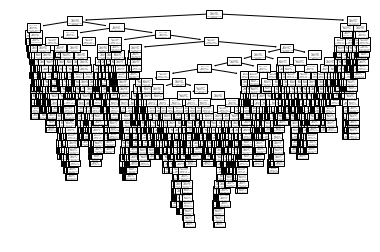

In [63]:
clf = tree.DecisionTreeClassifier()
fit= clf.fit(xtr,ytr)
tree.plot_tree(fit,class_names=["bird","dino","reptile","mammal"])
#graph.write_png('plstree.png')

## Testing

We can evaluate our decision tree on our testing data.

In [64]:
ypredict= clf.predict(xte)
print(ypredict)

[0 3 0 ... 0 0 3]


Let's test stacking!

In [ ]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [67]:
model1 = tree.DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

NameError: name 'x_train' is not defined

Calculate the accuracy of the decision tree by importing `metrics` from `sklearn` and then finding the accuracy score.

In [10]:
metrics.accuracy_score(yte,ypredict,normalize=True, sample_weight=None)

0.8174904942965779

## Beautification

If time permits, play around with changing the appearance of your decision tree and plotting a decision surface!

In [11]:
newtree= tree.export_graphviz(clf,class_names=["bird","dino","reptile","mammal"],feature_names=["Brain", "Body Mass" ],out_file=None,filled=True,rounded=True)
graph  = pydotplus.graph_from_dot_data(newtree)
colors = ('lavender', 'ivory')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('bigtree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.840438 to fit



True

In [8]:
max1= max(var["Brain mass (g)"])
min1= min(var["Brain mass (g)"])
max2= max(var["Body mass (g)"])
min2= min(var["Body mass (g)"])

In [10]:
xx, yy = np.meshgrid(np.log10(np.arange(0.0028, max2 + 0.05, 1000)),
                         np.log10(np.arange(0.58 - 0.05, max1+ 0.05,1000)))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

NameError: name 'clf' is not defined

In [ ]:
## Plot the contour plot
cs = plt.contourf(xx, yy, Z, cmap=mpl.colors.ListedColormap(['r','g','b','c']))
plt.xlabel("bodymass")
plt.ylabel("brain")
plt.xlim(np.log10(0.0028), np.log10(9000.0 + 0.05))
plt.ylim(np.log10(0.58 - 0.05), np.log10(9000+ 0.05))

# label the axes


# Plot the training points
for i, color in zip(range(4), "rgbc"):
    idx = np.where(y == i)
    plt.scatter(np.log10(x[idx, 0]), np.log10(x[idx, 1]), c=color, label=["Bird", "Dino","Reptile","Mammal"][i],
                cmap=mpl.colors.ListedColormap(['r','g','b','c']), edgecolor='black', s=15)

graph.write_png('jhvgf.png')